# In-Class Activity: Sentiment Analysis

_September 19, 2023_

In "Data Reimagined," you read about how researchers have analyzed speech and written text to draw conclusions about how people interact with each other. These kinds of analyses are part of a data science sub-field called [natural language processling, or NLP](https://en.wikipedia.org/wiki/Natural_language_processing).

In this activity, we'll do a simple NLP project using a method called [_sentiment analysis_](https://en.wikipedia.org/wiki/Sentiment_analysis), which looks at how many positive and negative words are used in a piece of text.

This activity is adapted from:

Zoë Wilkinson Saldaña, ["Sentiment Analysis for Exploratory Data Analysis,"](https://programminghistorian.org/en/lessons/sentiment-analysis) Programming Historian 7 (2018), https://doi.org/10.46430/phen0079.

### Getting started: Importing packages

We'll use a new package this time, nltk, as well as a couple of other features. Run the cells below to install everything you need.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# We'll be using a package called nltk, or the Natural Language Tool Kit
# If you are using Anaconda, it should already be installed and you just need to import it
import nltk

# This is the sentiment analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# If you run this block of code and get an error, you may need to install or update nltk
# See: https://www.nltk.org/install.html

We will be using a method called VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis ([GitHub page here](https://github.com/cjhutto/vaderSentiment#about-the-scoring)), which essentially looks at each individual word in a piece of text and marks it as either negative, positive, or neutral.

If you are curious, the paper that introduces this method (and goes into a great bit of detail!) is here:

[Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.](https://ojs.aaai.org/index.php/ICWSM/article/view/14550/14399)

The VADER lexicon has ~7500 words in it, and you can [view it here.](https://github.com/cjhutto/vaderSentiment/blob/master/vaderSentiment/vader_lexicon.txt)

**Some negative words**: awful, avoiding, boredom, ):<

**Some positive words**: awesome, boldest, clever, :)

**Some neutral words**: aboard, amorphously

The code below gets the VADER dataset, as well as a tokenizer (we'll get to it -- it turns a big block of text into smaller pieces, in our case, sentences).

In [3]:
# This is the VADER dataset
nltk.download('vader_lexicon')
# This is the tokenizer
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/wirfsbrj/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/wirfsbrj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# Let's use a sample sentence one...
aSentence = "Happy families are all alike; every unhappy family is unhappy in its own way."
bSentence = "I love data science :)"

In [5]:
# This code creates a sentiment intensity object (which we'll call sid)
sid = SentimentIntensityAnalyzer()

In [6]:
# This is how we get the sentiment scores for that sentence
scores = sid.polarity_scores(aSentence)

In [7]:
scores

{'neg': 0.276, 'neu': 0.542, 'pos': 0.182, 'compound': -0.2263}

In [8]:
# The sentiment scores are in the form of a dictionary
# This prints them in a nice format
for key in sorted(scores):
    print('{0}: {1}, '.format(key, scores[key]), end='')

compound: -0.2263, neg: 0.276, neu: 0.542, pos: 0.182, 

How do we read these scores?

* _compound_ is the overall sentiment for the piece of text. It is a number between -1 and 1, with -1 being the most negative possible, and 1 being the most positive possible. This a score of -0.2263 is only slightly negative.

* _neg_, _neu_, and _pos_ tell us the proportion of words in this piece of text that are negative, neutral or positive. In the sentence above, 27.6% of the words are negative, 54.2% are neutral, and 18.2% are positive.

### Now you try! Use the method above to find the sentiment scores of some different sentences or words.

In [9]:
# YOUR CODE HERE

Share with the person next to you some of the interesting things you found.

### Let's read in a bigger text file -- the chapter you read and annotated

The chapter is in a file called 'data-reimagined.txt' -- let's take a quick look at it in a text editor first.

In [10]:
# This code opens up the text file and saves it as variable called chapter
with open('data-reimagined.txt') as f:
    chapter = f.read()

In [11]:
# Let's see what it looks like
print(chapter)

At 6 A.M. on a particular Friday of every month, the streets of most of Manhattan will be largely desolate. The stores lining these streets will be closed,
their façades covered by steel security gates, the apartments above dark and silent.
The floors of Goldman Sachs, the global investment banking institution in lower Manhattan, on the other hand, will be brightly lit, its elevators taking
thousands of workers to their desks. By 7 A.M. most of these desks will be occupied.
It would not be unfair on any other day to describe this hour in this part of town as sleepy. On this Friday morning, however, there will be a buzz of
energy and excitement. On this day, information that will massively impact the stock market is set to arrive.
Minutes after its release, this information will be reported by news sites. Seconds after its release, this information will be discussed, debated, and
dissected, loudly, at Goldman and hundreds of other financial firms. But much of the real action in finance 

In [28]:
# This code gets the sentiment scores for the entire chapter (as one block)
scores = sid.polarity_scores(chapter)

In [29]:
# And let's print them out
for key in sorted(scores):
    print('{0}: {1}, '.format(key, scores[key]), end='')

compound: 1.0, neg: 0.058, neu: 0.828, pos: 0.115, 

What is going on here? Why is the compound score 1, when most of the words are neutral, and positive words are twice as likely as negative ones?

It has to do with how VADER calculates compound score -- which is based on the sum of all of the words. As a reminder, here's the equation:

$$\frac{x}{\sqrt{x^2+15}}$$

As you get more and more words (x gets larger in our sentiment score formula), the score approaches either 1 or -1! (For more on that, check out [this blog post.](https://medium.com/@piocalderon/vader-sentiment-analysis-explained-f1c4f9101cd9))

_(And the lesson here is: Always check how analysis methods you are using actually work!)_

### Tokenizing: Breaking up a big chunk of text into smaller pieces

So, in order to do analysis on this chapter, we'll need to **break it up into sentences.** This is called _tokenization_.

We'll use a built in tokenizer in nltk.

In [30]:
# Make the tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# Tokenize the chapter -- and save the tokens as a variable called sentences
sentences = tokenizer.tokenize(chapter)


In [31]:
# Let's examine...first print it out
# Note that sentences is a list

print(sentences)

['At 6 A.M. on a particular Friday of every month, the streets of most of Manhattan will be largely desolate.', 'The stores lining these streets will be closed,\ntheir façades covered by steel security gates, the apartments above dark and silent.', 'The floors of Goldman Sachs, the global investment banking institution in lower Manhattan, on the other hand, will be brightly lit, its elevators taking\nthousands of workers to their desks.', 'By 7 A.M. most of these desks will be occupied.', 'It would not be unfair on any other day to describe this hour in this part of town as sleepy.', 'On this Friday morning, however, there will be a buzz of\nenergy and excitement.', 'On this day, information that will massively impact the stock market is set to arrive.', 'Minutes after its release, this information will be reported by news sites.', 'Seconds after its release, this information will be discussed, debated, and\ndissected, loudly, at Goldman and hundreds of other financial firms.', 'But mu

In [32]:
# How many sentences do we have?

# YOUR CODE HERE
len(sentences)

731

In [34]:
# And pull out a single sentence to look at it

# YOUR CODE HERE
sentences[-1]

'And with all this new data, we can finally see through people’s lies.'

One way to analyze this whole chapter is to calculate a sentiment score for each sentence, and then look at the distribution of those. Let's do it...

In [35]:
# Build a list of compound (total) scores for each of our sentences
compound_scores = []
for sentence in sentences:
    # This selects the compound score from the dictionary of sentiment scores
    compound_scores.append(sid.polarity_scores(sentence)['compound'])

In [36]:
# Now let's put them in a dataframe
# There are many ways to do this, but here's one:
# First we "zip" the two lists (sentences, compound_scores) into a tuple
sentence_sentiment = list(zip(sentences, compound_scores))

# Then we create a new data frame, df, and give it the tuple and a list of column names
df = pd.DataFrame(sentence_sentiment, columns=['Sentence','Compound Score'])

In [37]:
# Let's examine it using .describe(), .head(), etc...

# YOUR CODE HERE
df.head()

,Sentence,Compound Score
0,At 6 A.M. on a particular Friday of every mont...,0.0000
1,The stores lining these streets will be closed...,0.3400
2,"The floors of Goldman Sachs, the global invest...",0.5423
3,By 7 A.M. most of these desks will be occupied.,0.0000
4,It would not be unfair on any other day to des...,0.3724


In [38]:
df.describe()

,Compound Score
count,731.000000
mean,0.108664
std,0.348876
min,-0.893400
25%,0.000000
50%,0.000000
75%,0.396200
max,0.920100


In [41]:
# Sort by the 'Compound Score' column to see our range
# Lets save it as a new data frame, df_sorted

# YOUR CODE HERE
df_sorted = df.sort_values('Compound Score', ascending=False)

In [42]:
df_sorted

,Sentence,Compound Score
473,If someone writes “I am happy and in love and ...,0.9201
200,153 was a two-year-old who ran faster than eve...,0.9153
571,Republicans and Democrats presumably both have...,0.8957
50,But the opportunity to know how much solitaire...,0.8885
361,"For one thing, we learn about the slow growth\...",0.8860
...,...,...
160,"(Every year, hundreds of horses die on America...",-0.7906
483,"Generally, I think many people are secretly sa...",-0.7964
381,But many have long\nsuspected the cause was th...,-0.8271
474,If someone writes “I am sad thinking about all...,-0.8779


In [45]:
# Most positive sentence
# Hint: Use .iloc to select a row, and then select the 'Sentence' column from that row

# YOUR CODE HERE
df_sorted.iloc[0]["Sentence"]

'If someone writes “I am happy and in love and feeling awesome,”\nsentiment analysis would code that as extremely happy text.'

In [46]:
# And the most negative sentence

# YOUR CODE HERE
df_sorted.iloc[-1]["Sentence"]

'In other words, just from the words, the computer was able to detect that things go from bad to worse to worst.'

In [24]:
# What other sentences might you examine?

# YOUR CODE HERE

In [25]:
# Challenge 1: 
# Add columns in your data frame for the percent of positive, negative, and neutral words in each sentence
# What sentence has the highest proportion of positive words?
# What sentence has the highest proportion of negative words?

# YOUR CODE HERE

<Axes: >

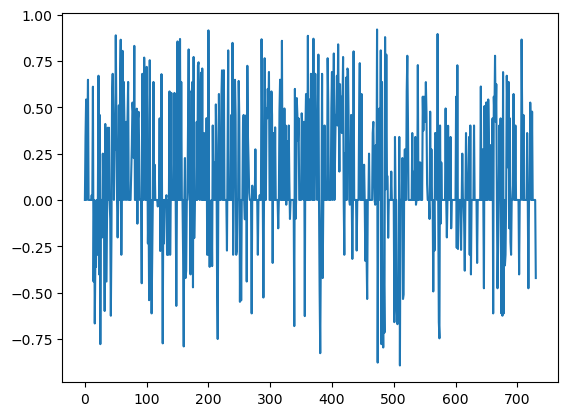

In [48]:
# Challenge 2:
# Make a plot or plots to visualize the sentiment data for the "Data Reimagined" chapter
# You might start with a line plot (see notes from last week)
# If you want to try something new, check out the histogram: https://matplotlib.org/stable/gallery/statistics/hist.html
# Hint: to make a line plot, use .plot(), to make a histogram, use .hist()
# You'll also need to import matplotlib using: from matplotlib import pyplot as plt

# YOUR CODE HERE
from matplotlib import pyplot as plt

df["Compound Score"].plot()

<Axes: >

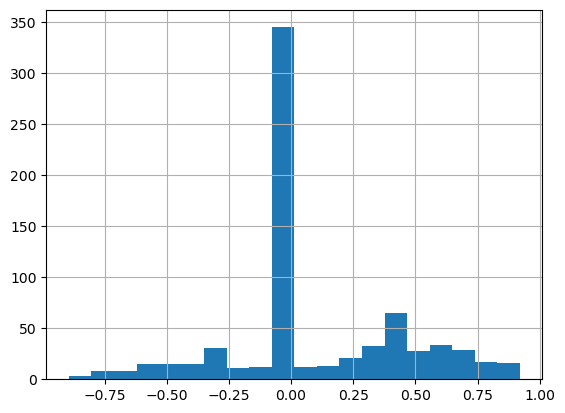

In [50]:
df["Compound Score"].hist(bins=20)

In [27]:
# Challenge 3:
# Pick another piece of text to analyze.
# It could be a paper you wrote, or social media posts, or your annotations on the chapter, or anything...
# Perform a basic sentiment analysis on it

# YOUR CODE HERE